### Linear Regression Model using Pipelines and Gridsearch

INTRODUCTION: This notebook is about finding the best paramater for our Linear Regression Model.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [3]:
df_modeling = pd.read_csv(filepath_or_buffer= "../data/Dataset_for_modeling.csv") 
df_modeling.head()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Arcade,Category_Books & Reference,Category_Business,...,Category_Productivity,Category_Puzzle,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel & Local,Category_other,Content_Rating_Everyone,Content_Rating_Not for Everyone
0,3.9,68.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.3,918.0,1,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,5.0,6.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,830.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train-Test-Split

The train test split is a machine learning practice commonly use to evaluate the performance of a model. The goal is to split the dataset into 2 part, the first part is the training then the other is the testing. The trained will be used to train the model while the test part will be used evaluate the model and see if it is predictive. The split made is 80% for the train and 20% for the test. 

In [4]:
X = df_modeling.drop(columns= 'Rating')
y = df_modeling['Rating']

In [5]:
X.shape

(9663, 29)

In [6]:
y.shape

(9663,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 1234)

###  Tuning Model : Broad Parameters

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',LinearRegression())
])
Params = [{
        'model': [Lasso()],
        'model__alpha': [0.1, 1, 10], 
        'model__fit_intercept': [True, False],
    },
    {
        'model': [Ridge()],
        'model__alpha': [0.1, 1, 10],
        'model__fit_intercept': [True, False],
    }
]

grid_search1 = GridSearchCV(pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [Lasso()], 'model__alpha': [0.1, 1, 10],
                          'model__fit_intercept': [True, False]},
                         {'model': [Ridge(alpha=10)],
                          'model__alpha': [0.1, 1, 10],
                          'model__fit_intercept': [True, False]}],
             verbose=1)

In [9]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search1.best_params_, grid_search1.best_score_))

Best parameters are {'model': Ridge(alpha=10), 'model__alpha': 10, 'model__fit_intercept': True} with a score of 0.06


We can see that the best parametters for the Linear regression is model Ridge alpha 10 which protect the model to over fitting which is a form of regularization and 10 is the strenght of the regularization, then the model__fit_intercept is set on true wich mean the model will determine the coefficient of each feature and the intercept term. The score is 0.06 which show that the model is not fitting. We will change the parameted to try to get a better score.

In [10]:
y_pred1 = grid_search1.predict(X_test)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)


print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

Mean Absolute Error (MAE): 1.920988017765237
Coefficient of Determination (R-squared): 0.0639603300189241


In [11]:
grid_search1.score(X_test, y_test)

0.0639603300189241

###  Tuning Model : Tuned parameters

In [12]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',LinearRegression())
])

Params = [{
        'model': [Lasso()],
        'model__alpha': [0.1, 1, 10],
        'model__fit_intercept': [True, False],
    },
    {
        'model': [Ridge()],
        'model__alpha': [2, 4, 6, 8],
        'model__fit_intercept': [True, False],
    }
]

grid_search2 = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [Lasso()], 'model__alpha': [0.1, 1, 10],
                          'model__fit_intercept': [True, False]},
                         {'model': [Ridge(alpha=8)],
                          'model__alpha': [2, 4, 6, 8],
                          'model__fit_intercept': [True, False]}],
             verbose=1)

In [13]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search2.best_params_, grid_search2.best_score_))

Best parameters are {'model': Ridge(alpha=8), 'model__alpha': 8, 'model__fit_intercept': True} with a score of 0.06


We can see that the best parametters for the Linear regression is model Ridge alpha 8 which protect the model to over fitting which is a form of regularization and 8 is the strenght of the regularization, then the model__fit_intercept is set on true wich mean the model will determine the coefficient of each feature and the intercept term. The score is 0.06 which show that the model is not fitting.

In [14]:
y_pred2 = grid_search2.predict(X_test)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)


print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

Mean Absolute Error (MAE): 1.920966071564433
Coefficient of Determination (R-squared): 0.06395820279550124


In [15]:
grid_search2.score(X_test, y_test)

0.06395820279550124

### Evaluation 

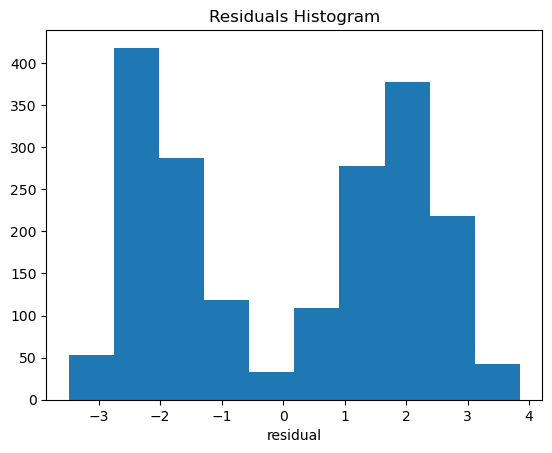

In [16]:
# Print the accuracy
metrics.r2_score(y_test, y_pred1)

plt.hist([y_test-y_pred1])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.savefig('Residuals for LR1 with gridsearch.png')
plt.show()



The model with the broad parameters doesnt fit as the residuals bar is not equally distributed. 

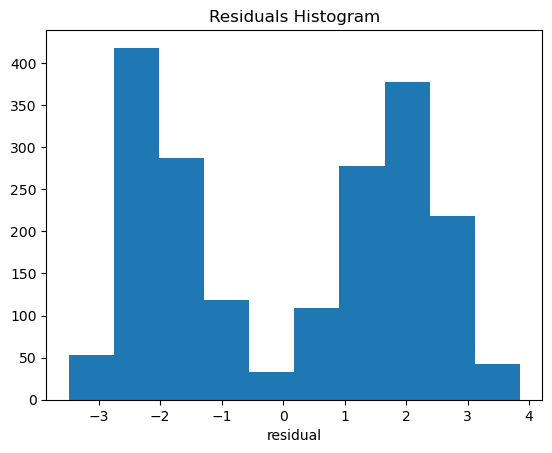

In [17]:
# Print the accuracy
metrics.r2_score(y_test, y_pred2)

plt.hist([y_test-y_pred2])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.savefig('Residuals for LR2 with gridsearch.png')
plt.show()

The model with the tuned parameters doesnt fit as the residuals bar is not equally distributed. 

CONCLUSION: We can see that the result of our models with the parametes didnt improve the baseline model score. So we we can conclude that the model doesnt fit. We will now work on tuning our second model the Decision Tree regressor. 